Group 3

Harrshit Limbodia	2019B4A40815H

Ninaad Pinakin Thakkar 	2019B4A40872H

Gautam Gupta	2019B2A41118H

Karan Moza	2019B4A71372H

Khushi Khanna 	2019B4A10850H

Aryaa Bharani	2019B1A11556H

Arnav Bhatara	2019B4AA1304H

Sankalp Bhadoria	2019B3AA1269H

Abhimanyu Singh Rana	2019B3A80701H

Event: 8th November 2016 Demonetization


In [ ]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
icicidf = yf.download('ICICIBANK.NS', 
                      start='2015-12-16', 
                      end='2017-01-04', 
                      progress=False
)
icicidf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,224.772720,230.454544,221.500000,229.136368,217.618607,18885293
2015-12-17,230.863632,232.090912,227.363632,230.136368,218.568329,17692297
2015-12-18,229.181824,230.000000,227.136368,227.363632,215.934998,14450734
2015-12-21,227.363632,235.909088,227.272720,234.727264,222.928513,14307700
2015-12-22,233.181824,239.545456,233.136368,235.954544,224.094070,21342967


In [ ]:
nifty_df = yf.download('^NSEI',start='2015-12-16', 
                      end='2017-01-04', 
                      progress=False
)
nifty_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-16,7725.250000,7776.600098,7715.750000,7750.899902,7750.899902,154300
2015-12-17,7783.049805,7852.899902,7737.549805,7844.350098,7844.350098,175900
2015-12-18,7828.899902,7836.149902,7753.350098,7761.950195,7761.950195,191400
2015-12-21,7745.649902,7840.750000,7733.450195,7834.450195,7834.450195,126300
2015-12-22,7829.399902,7846.299805,7776.850098,7786.100098,7786.100098,125700


In [ ]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY']) 

Date
2015-12-16         NaN
2015-12-17    0.011985
2015-12-18   -0.010560
2015-12-21    0.009297
2015-12-22   -0.006191
                ...   
2016-12-28    0.000249
2016-12-29    0.008520
2016-12-30    0.010093
2017-01-02   -0.000770
2017-01-03    0.001558
Name: Return_NIFTY, Length: 257, dtype: float64


In [ ]:
#removing one enties from NIFTY 50 data
nifty_df.dropna(inplace=True)

In [ ]:
icicidf['Return_ICICI'] = np.log(icicidf['Adj Close']/icicidf['Adj Close'].shift(1))
print(icicidf['Return_ICICI']) 

Date
2015-12-16         NaN
2015-12-17    0.004355
2015-12-18   -0.012121
2015-12-21    0.031874
2015-12-22    0.005215
                ...   
2016-12-28   -0.007124
2016-12-29   -0.002585
2016-12-30    0.016588
2017-01-02   -0.013209
2017-01-03    0.009677
Name: Return_ICICI, Length: 259, dtype: float64


In [ ]:
#removing one enties from company data
icicidf.dropna(inplace=True)

In [ ]:
icicidf

,Open,High,Low,Close,Adj Close,Volume,Return_ICICI
Date,,,,,,,
2015-12-17,230.863632,232.090912,227.363632,230.136368,218.568329,17692297,0.004355
2015-12-18,229.181824,230.000000,227.136368,227.363632,215.934998,14450734,-0.012121
2015-12-21,227.363632,235.909088,227.272720,234.727264,222.928513,14307700,0.031874
2015-12-22,233.181824,239.545456,233.136368,235.954544,224.094070,21342967,0.005215
2015-12-23,236.000000,239.045456,235.545456,238.045456,226.079865,11533960,0.008822
...,...,...,...,...,...,...,...
2016-12-28,230.909088,231.636368,228.227264,228.863632,221.832947,9176829,-0.007124
2016-12-29,229.181824,230.000000,227.318176,228.272720,221.260178,6379633,-0.002585
2016-12-30,229.090912,234.090912,228.500000,232.090912,224.961090,11565801,0.016588


In [ ]:
icicireturns = icicidf['Return_ICICI']
icicireturns.head()


Date
2015-12-17    0.004355
2015-12-18   -0.012121
2015-12-21    0.031874
2015-12-22    0.005215
2015-12-23    0.008822
Name: Return_ICICI, dtype: float64

In [ ]:
niftyreturns = nifty_df['Return_NIFTY']
niftyreturns.head()

Date
2015-12-17    0.011985
2015-12-18   -0.010560
2015-12-21    0.009297
2015-12-22   -0.006191
2015-12-23    0.010203
Name: Return_NIFTY, dtype: float64

In [ ]:
#Combining the NIFTY 50 and Company returns 
returns = pd.merge(niftyreturns,icicireturns,how='inner',on='Date')
returns.head()

,Return_NIFTY,Return_ICICI
Date,,
2015-12-17,0.011985,0.004355
2015-12-18,-0.010560,-0.012121
2015-12-21,0.009297,0.031874
2015-12-22,-0.006191,0.005215
2015-12-23,0.010203,0.008822


In [ ]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2015-12-17 to 2017-01-03
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  256 non-null    float64
 1   Return_ICICI  256 non-null    float64
dtypes: float64(2)
memory usage: 6.0 KB


In [ ]:
nifty_df.shape

(256, 7)

In [ ]:
nifty_df

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2015-12-17,7783.049805,7852.899902,7737.549805,7844.350098,7844.350098,175900,0.011985
2015-12-18,7828.899902,7836.149902,7753.350098,7761.950195,7761.950195,191400,-0.010560
2015-12-21,7745.649902,7840.750000,7733.450195,7834.450195,7834.450195,126300,0.009297
2015-12-22,7829.399902,7846.299805,7776.850098,7786.100098,7786.100098,125700,-0.006191
2015-12-23,7830.450195,7871.450195,7826.100098,7865.950195,7865.950195,117900,0.010203
...,...,...,...,...,...,...,...
2016-12-28,8047.549805,8100.549805,8028.399902,8034.850098,8034.850098,126700,0.000249
2016-12-29,8030.600098,8111.100098,8020.799805,8103.600098,8103.600098,178500,0.008520
2016-12-30,8119.649902,8197.000000,8114.750000,8185.799805,8185.799805,127600,0.010093


In [ ]:
returns.shape

(256, 2)

Regression by Market Model

In [ ]:
x = returns['Return_NIFTY']
y = returns['Return_ICICI']
x_sm = sm.add_constant(x)

In [ ]:
#Regression - Market model 
marketmodel = sm.OLS(y,x_sm)

In [ ]:
resultsmm = marketmodel.fit()

In [ ]:
resultsmm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Return_ICICI   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     219.7
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           3.12e-36
Time:                        13:33:51   Log-Likelihood:                 689.39
No. Observations:                 256   AIC:                            -1375.
Df Residuals:                     254   BIC:                            -1368.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0003      0.001     -0.301      0.764      -0.002       0.002
Return_NIFTY     1.6114      0.109     14.821      0.000       1.397       1.825
==============================================================================
Omnibus:                       28.848   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.702
Skew:                           0.365   Prob(JB):                     8.23e-23
Kurtosis:                       6.000   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
betaicicimm=resultsmm.params[1]

In [ ]:
resultsmm.f_pvalue

3.119668275700136e-36

In [ ]:
returnsicici=returns

In [ ]:
returnsicici['ER_MM']=returnsicici['Return_NIFTY']*betaicicimm

In [ ]:
returnsicici

,Return_NIFTY,Return_ICICI,ER_MM
Date,,,
2015-12-17,0.011985,0.004355,0.019311
2015-12-18,-0.010560,-0.012121,-0.017016
2015-12-21,0.009297,0.031874,0.014981
2015-12-22,-0.006191,0.005215,-0.009975
2015-12-23,0.010203,0.008822,0.016441
...,...,...,...
2016-12-28,0.000249,-0.007124,0.000401
2016-12-29,0.008520,-0.002585,0.013729
2016-12-30,0.010093,0.016588,0.016263


Using CAPM

In [ ]:
rfr=0.02/100

In [ ]:
returnsicici['Rm-Rf']=returnsicici['Return_NIFTY']-rfr

In [ ]:
x = returns['Rm-Rf']
y = returns['Return_ICICI']
x_sm = sm.add_constant(x)

In [ ]:
capmmodel = sm.OLS(y,x_sm)

In [ ]:
resultscapm = capmmodel.fit()

In [ ]:
resultscapm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Return_ICICI   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     219.7
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           3.12e-36
Time:                        13:34:16   Log-Likelihood:                 689.39
No. Observations:                 256   AIC:                            -1375.
Df Residuals:                     254   BIC:                            -1368.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.297e-05      0.001      0.013      0.990      -0.002       0.002
Rm-Rf          1.6114      0.109     14.821      0.000       1.397       1.825
==============================================================================
Omnibus:                       28.848   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.702
Skew:                           0.365   Prob(JB):                     8.23e-23
Kurtosis:                       6.000   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
returnsicici['ER_CAPM']=rfr+resultscapm.params[1]*returnsicici['Rm-Rf']

In [ ]:
returnsicici

,Return_NIFTY,Return_ICICI,ER_MM,Rm-Rf,ER_CAPM
Date,,,,,
2015-12-17,0.011985,0.004355,0.019311,0.011785,0.019189
2015-12-18,-0.010560,-0.012121,-0.017016,-0.010760,-0.017138
2015-12-21,0.009297,0.031874,0.014981,0.009097,0.014859
2015-12-22,-0.006191,0.005215,-0.009975,-0.006391,-0.010098
2015-12-23,0.010203,0.008822,0.016441,0.010003,0.016319
...,...,...,...,...,...
2016-12-28,0.000249,-0.007124,0.000401,0.000049,0.000279
2016-12-29,0.008520,-0.002585,0.013729,0.008320,0.013607
2016-12-30,0.010093,0.016588,0.016263,0.009893,0.016140


FAMA 3

In [ ]:
famadf=pd.read_csv("C:\\Users\\harrs\\OneDrive\\Desktop\\2021-03_FourFactors_and_Market_Returns_Daily_SurvivorshipBiasAdjusted.csv")

In [ ]:
famadf.set_index('Date',inplace=True)

In [ ]:
famadf.drop(260,inplace=True)

In [ ]:
famadf

,SMB,HML,WML,MF,RF,days to event
Date,,,,,,
2015-12-16,-0.697017,0.386837,-0.357558,0.447390,0.028099,-220
2015-12-17,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2015-12-18,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
2015-12-21,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
2015-12-22,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
...,...,...,...,...,...,...
2016-12-29,-0.609323,0.376913,0.296232,1.086604,0.024439,36
2016-12-30,0.292598,0.134040,-0.193442,0.984796,0.024439,37
2017-01-02,0.646568,1.114708,0.634339,0.842830,0.024439,38


In [ ]:
returnsicici

,Return_NIFTY,Return_ICICI,ER_MM,Rm-Rf,ER_CAPM
Date,,,,,
2015-12-17,0.011985,0.004355,0.019311,0.011785,0.019189
2015-12-18,-0.010560,-0.012121,-0.017016,-0.010760,-0.017138
2015-12-21,0.009297,0.031874,0.014981,0.009097,0.014859
2015-12-22,-0.006191,0.005215,-0.009975,-0.006391,-0.010098
2015-12-23,0.010203,0.008822,0.016441,0.010003,0.016319
...,...,...,...,...,...
2016-12-28,0.000249,-0.007124,0.000401,0.000049,0.000279
2016-12-29,0.008520,-0.002585,0.013729,0.008320,0.013607
2016-12-30,0.010093,0.016588,0.016263,0.009893,0.016140


In [ ]:
returnsicici.index

DatetimeIndex(['2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2017-01-02', '2017-01-03'],
              dtype='datetime64[ns]', name='Date', length=256, freq=None)

In [ ]:
famadf.index=pd.to_datetime(famadf.index)

In [ ]:
famadf.index

DatetimeIndex(['2015-12-16', '2015-12-17', '2015-12-18', '2015-12-21',
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-28',
               '2015-12-29', '2015-12-30',
               ...
               '2016-12-22', '2016-12-23', '2016-12-26', '2016-12-27',
               '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-02',
               '2017-01-03', '2017-01-04'],
              dtype='datetime64[ns]', name='Date', length=261, freq=None)

In [ ]:
returnsicici=returnsicici.join(famadf)

In [ ]:
returnsicici

,Return_NIFTY,Return_ICICI,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event
Date,,,,,,,,,,,
2015-12-17,0.011985,0.004355,0.019311,0.011785,0.019189,-0.102805,1.226592,0.346055,1.263357,0.028256,-219
2015-12-18,-0.010560,-0.012121,-0.017016,-0.010760,-0.017138,0.588487,0.073747,0.526803,-0.667976,0.028256,-218
2015-12-21,0.009297,0.031874,0.014981,0.009097,0.014859,0.413700,0.855782,-0.658280,0.708558,0.028256,-217
2015-12-22,-0.006191,0.005215,-0.009975,-0.006391,-0.010098,0.544714,0.488610,0.026780,-0.394539,0.028256,-216
2015-12-23,0.010203,0.008822,0.016441,0.010003,0.016319,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.007124,0.000401,0.000049,0.000279,0.987619,-0.501282,-0.077401,0.278990,0.024186,35
2016-12-29,0.008520,-0.002585,0.013729,0.008320,0.013607,-0.609323,0.376913,0.296232,1.086604,0.024439,36
2016-12-30,0.010093,0.016588,0.016263,0.009893,0.016140,0.292598,0.134040,-0.193442,0.984796,0.024439,37


In [ ]:
X=returnsicici[['Rm-Rf','SMB','HML']]
y=returnsicici['Return_ICICI']
X = sm.add_constant(X)

In [ ]:
ff3=sm.OLS(y,X)

In [ ]:
resultsff3=ff3.fit()

In [ ]:
resultsff3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Return_ICICI   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     75.62
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           6.50e-35
Time:                        13:52:48   Log-Likelihood:                 691.80
No. Observations:                 256   AIC:                            -1376.
Df Residuals:                     252   BIC:                            -1361.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.347e-05      0.001     -0.062      0.951      -0.002       0.002
Rm-Rf          1.4956      0.122     12.216      0.000       1.254       1.737
SMB            0.0013      0.001      0.936      0.350      -0.001       0.004
HML            0.0022      0.001      1.994      0.047    2.69e-05       0.004
==============================================================================
Omnibus:                       28.031   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.905
Skew:                           0.383   Prob(JB):                     1.82e-20
Kurtosis:                       5.817   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
resultsff3.params[3]

0.0022121495817203525

In [ ]:
returnsicici['ER_ff3']=rfr+resultsff3.params[1]*returnsicici['Rm-Rf']+resultsff3.params[3]*returnsicici['HML']

FAMA FRENCH 4

In [ ]:
X=returnsicici[['Rm-Rf','SMB','HML','MF']]
y=returnsicici['Return_ICICI']
X = sm.add_constant(X)

In [ ]:
ff4=sm.OLS(y,X)
resultsff4=ff4.fit()
resultsff4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Return_ICICI   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     77.22
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.32e-42
Time:                        13:58:51   Log-Likelihood:                 712.31
No. Observations:                 256   AIC:                            -1415.
Df Residuals:                     251   BIC:                            -1397.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.001      0.121      0.904      -0.002       0.002
Rm-Rf          3.6819      0.350     10.525      0.000       2.993       4.371
SMB            0.0064      0.002      4.195      0.000       0.003       0.009
HML            0.0062      0.001      5.212      0.000       0.004       0.009
MF            -0.0257      0.004     -6.605      0.000      -0.033      -0.018
==============================================================================
Omnibus:                       15.571   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.366
Skew:                           0.270   Prob(JB):                     9.37e-08
Kurtosis:                       4.656   Cond. No.                         463.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
returnsicici['ER_ff4']=rfr+resultsff4.params[1]*returnsicici['Rm-Rf']+resultsff4.params[3]*returnsicici['HML']+resultsff4.params[2]*returnsicici['SMB']+resultsff4.params[4]*returnsicici['MF']

In [ ]:
returnsicici

,Return_NIFTY,Return_ICICI,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4
Date,,,,,,,,,,,,,
2015-12-17,0.011985,0.004355,0.019311,0.011785,0.019189,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.020538,0.018047
2015-12-18,-0.010560,-0.012121,-0.017016,-0.010760,-0.017138,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.015729,-0.018034
2015-12-21,0.009297,0.031874,0.014981,0.009097,0.014859,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.015698,0.023405
2015-12-22,-0.006191,0.005215,-0.009975,-0.006391,-0.010098,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.008277,-0.006684
2015-12-23,0.010203,0.008822,0.016441,0.010003,0.016319,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.016394,0.012039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.007124,0.000401,0.000049,0.000279,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,-0.000836,-0.003637
2016-12-29,0.008520,-0.002585,0.013729,0.008320,0.013607,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.013477,0.001345
2016-12-30,0.010093,0.016588,0.016263,0.009893,0.016140,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.015291,0.013975


In [ ]:
returnsicici['AR_MM']=returnsicici['Return_ICICI']-returnsicici['ER_MM']

In [ ]:
returnsicici['AR_CAPM']=returnsicici['Return_ICICI']-returnsicici['ER_CAPM']

In [ ]:
returnsicici['AR_ff3']=returnsicici['Return_ICICI']-returnsicici['ER_ff3']

In [ ]:
returnsicici['AR_ff4']=returnsicici['Return_ICICI']-returnsicici['ER_ff4']

In [ ]:
returnsicici

,Return_NIFTY,Return_ICICI,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.004355,0.019311,0.011785,0.019189,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.020538,0.018047,-0.014957,-0.014835,-0.016183,-0.013692
2015-12-18,-0.010560,-0.012121,-0.017016,-0.010760,-0.017138,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.015729,-0.018034,0.004895,0.005017,0.003608,0.005913
2015-12-21,0.009297,0.031874,0.014981,0.009097,0.014859,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.015698,0.023405,0.016893,0.017015,0.016175,0.008469
2015-12-22,-0.006191,0.005215,-0.009975,-0.006391,-0.010098,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.008277,-0.006684,0.015190,0.015312,0.013491,0.011899
2015-12-23,0.010203,0.008822,0.016441,0.010003,0.016319,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.016394,0.012039,-0.007619,-0.007496,-0.007572,-0.003217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.007124,0.000401,0.000049,0.000279,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,-0.000836,-0.003637,-0.007526,-0.007403,-0.006289,-0.003487
2016-12-29,0.008520,-0.002585,0.013729,0.008320,0.013607,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.013477,0.001345,-0.016314,-0.016192,-0.016062,-0.003931
2016-12-30,0.010093,0.016588,0.016263,0.009893,0.016140,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.015291,0.013975,0.000326,0.000448,0.001297,0.002613


In [ ]:
returnsicici_eventwindowbeyond=returnsicici[returnsicici['days to event']>=-20]

In [ ]:
returnsicici_eventwindowbeyond

,Return_NIFTY,Return_ICICI,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2016-10-07,-0.001373,-0.002590,-0.002212,-0.001573,-0.002335,0.228604,0.717509,0.078106,-0.143927,0.024852,-20,-0.000565,0.004019,-0.000378,-0.000256,-0.002025,-0.006609
2016-10-10,0.001287,-0.001997,0.002074,0.001087,0.001951,0.213081,0.713678,-0.218750,0.292234,0.024852,-19,0.003404,0.002468,-0.004071,-0.003949,-0.005401,-0.004465
2016-10-13,-0.015675,-0.036442,-0.025259,-0.015875,-0.025381,-0.069428,-0.664808,0.133060,-1.340170,0.024653,-18,-0.025013,-0.028338,-0.011183,-0.011061,-0.011428,-0.008104
2016-10-14,0.001172,0.002485,0.001888,0.000972,0.001766,0.562358,0.113083,0.519589,0.555531,0.024653,-17,0.001903,-0.006242,0.000597,0.000719,0.000582,0.008727
2016-10-17,-0.007367,0.067958,-0.011871,-0.007567,-0.011993,0.958439,-0.016732,0.153664,-0.846533,0.024653,-16,-0.011154,0.000105,0.079829,0.079951,0.079112,0.067853
2016-10-18,0.018316,0.043855,0.029514,0.018116,0.029392,0.115323,0.401454,-0.157189,1.273019,0.024653,-15,0.028182,0.037373,0.014341,0.014463,0.015673,0.006482
2016-10-19,-0.002169,-0.019799,-0.003495,-0.002369,-0.003617,0.494551,0.671722,-0.331019,0.238067,0.024653,-14,-0.001857,-0.007335,-0.016304,-0.016182,-0.017942,-0.012464
2016-10-20,0.004643,0.046263,0.007482,0.004443,0.007360,-0.248365,1.488726,-0.118671,0.212062,0.024809,-13,0.010139,0.018770,0.038781,0.038903,0.036124,0.027493
2016-10-21,-0.000730,-0.000721,-0.001177,-0.000930,-0.001299,0.652782,-0.368136,0.081786,0.098028,0.024809,-12,-0.002006,-0.003887,0.000456,0.000578,0.001285,0.003166


In [ ]:
returnsicici_eventwindowbeyond['CAR_MM']=returnsicici_eventwindowbeyond['AR_MM'].cumsum()

In [ ]:
returnsicici_eventwindowbeyond['CAR_CAPM']=returnsicici_eventwindowbeyond['AR_CAPM'].cumsum()

In [ ]:
returnsicici_eventwindowbeyond['CAR_ff3']=returnsicici_eventwindowbeyond['AR_ff3'].cumsum()

In [ ]:
returnsicici_eventwindowbeyond['CAR_ff4']=returnsicici_eventwindowbeyond['AR_ff4'].cumsum()

In [ ]:
returnsicici_eventwindowbeyond

,Return_NIFTY,Return_ICICI,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,...,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4,CAR_MM,CAR_CAPM,CAR_ff3,CAR_ff4
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-07,-0.001373,-0.002590,-0.002212,-0.001573,-0.002335,0.228604,0.717509,0.078106,-0.143927,0.024852,...,-0.000565,0.004019,-0.000378,-0.000256,-0.002025,-0.006609,-0.000378,-0.000256,-0.002025,-0.006609
2016-10-10,0.001287,-0.001997,0.002074,0.001087,0.001951,0.213081,0.713678,-0.218750,0.292234,0.024852,...,0.003404,0.002468,-0.004071,-0.003949,-0.005401,-0.004465,-0.004449,-0.004204,-0.007427,-0.011074
2016-10-13,-0.015675,-0.036442,-0.025259,-0.015875,-0.025381,-0.069428,-0.664808,0.133060,-1.340170,0.024653,...,-0.025013,-0.028338,-0.011183,-0.011061,-0.011428,-0.008104,-0.015632,-0.015265,-0.018855,-0.019178
2016-10-14,0.001172,0.002485,0.001888,0.000972,0.001766,0.562358,0.113083,0.519589,0.555531,0.024653,...,0.001903,-0.006242,0.000597,0.000719,0.000582,0.008727,-0.015035,-0.014546,-0.018273,-0.010451
2016-10-17,-0.007367,0.067958,-0.011871,-0.007567,-0.011993,0.958439,-0.016732,0.153664,-0.846533,0.024653,...,-0.011154,0.000105,0.079829,0.079951,0.079112,0.067853,0.064794,0.065405,0.060839,0.057402
2016-10-18,0.018316,0.043855,0.029514,0.018116,0.029392,0.115323,0.401454,-0.157189,1.273019,0.024653,...,0.028182,0.037373,0.014341,0.014463,0.015673,0.006482,0.079135,0.079869,0.076512,0.063885
2016-10-19,-0.002169,-0.019799,-0.003495,-0.002369,-0.003617,0.494551,0.671722,-0.331019,0.238067,0.024653,...,-0.001857,-0.007335,-0.016304,-0.016182,-0.017942,-0.012464,0.062831,0.063687,0.058570,0.051421
2016-10-20,0.004643,0.046263,0.007482,0.004443,0.007360,-0.248365,1.488726,-0.118671,0.212062,0.024809,...,0.010139,0.018770,0.038781,0.038903,0.036124,0.027493,0.101612,0.102590,0.094694,0.078914
2016-10-21,-0.000730,-0.000721,-0.001177,-0.000930,-0.001299,0.652782,-0.368136,0.081786,0.098028,0.024809,...,-0.002006,-0.003887,0.000456,0.000578,0.001285,0.003166,0.102068,0.103168,0.095979,0.082080


In [ ]:
returnsicici

,Return_NIFTY,Return_ICICI,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,days to event,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4
Date,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.004355,0.019311,0.011785,0.019189,-0.102805,1.226592,0.346055,1.263357,0.028256,-219,0.020538,0.018047,-0.014957,-0.014835,-0.016183,-0.013692
2015-12-18,-0.010560,-0.012121,-0.017016,-0.010760,-0.017138,0.588487,0.073747,0.526803,-0.667976,0.028256,-218,-0.015729,-0.018034,0.004895,0.005017,0.003608,0.005913
2015-12-21,0.009297,0.031874,0.014981,0.009097,0.014859,0.413700,0.855782,-0.658280,0.708558,0.028256,-217,0.015698,0.023405,0.016893,0.017015,0.016175,0.008469
2015-12-22,-0.006191,0.005215,-0.009975,-0.006391,-0.010098,0.544714,0.488610,0.026780,-0.394539,0.028256,-216,-0.008277,-0.006684,0.015190,0.015312,0.013491,0.011899
2015-12-23,0.010203,0.008822,0.016441,0.010003,0.016319,-0.862967,0.557727,-0.483292,0.892845,0.028256,-215,0.016394,0.012039,-0.007619,-0.007496,-0.007572,-0.003217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.007124,0.000401,0.000049,0.000279,0.987619,-0.501282,-0.077401,0.278990,0.024186,35,-0.000836,-0.003637,-0.007526,-0.007403,-0.006289,-0.003487
2016-12-29,0.008520,-0.002585,0.013729,0.008320,0.013607,-0.609323,0.376913,0.296232,1.086604,0.024439,36,0.013477,0.001345,-0.016314,-0.016192,-0.016062,-0.003931
2016-12-30,0.010093,0.016588,0.016263,0.009893,0.016140,0.292598,0.134040,-0.193442,0.984796,0.024439,37,0.015291,0.013975,0.000326,0.000448,0.001297,0.002613


In [ ]:
returnsicici_eventwindowbeyond[['Return_ICICI','CAR_MM']]

,Return_ICICI,CAR_MM
Date,,
2016-10-07,-0.002590,-0.000378
2016-10-10,-0.001997,-0.004449
2016-10-13,-0.036442,-0.015632
2016-10-14,0.002485,-0.015035
2016-10-17,0.067958,0.064794
2016-10-18,0.043855,0.079135
2016-10-19,-0.019799,0.062831
2016-10-20,0.046263,0.101612
2016-10-21,-0.000721,0.102068


In [ ]:
returnsicicifinal=returnsicici.join(returnsicici_eventwindowbeyond[['CAR_MM','CAR_CAPM','CAR_ff3','CAR_ff4']],on='Date',how='left')

In [ ]:
returnsicicifinal.columns

Index(['Return_NIFTY', 'Return_ICICI', 'ER_MM', 'Rm-Rf', 'ER_CAPM', 'SMB',
       'HML', 'WML', 'MF', 'RF', 'days to event', 'ER_ff3', 'ER_ff4', 'AR_MM',
       'AR_CAPM', 'AR_ff3', 'AR_ff4', 'CAR_MM', 'CAR_CAPM', 'CAR_ff3',
       'CAR_ff4'],
      dtype='object')

In [ ]:
#final data with all AR, CAR, factors of APM and expected returns acc. to diff. models
returnsicicifinal

,Return_NIFTY,Return_ICICI,ER_MM,Rm-Rf,ER_CAPM,SMB,HML,WML,MF,RF,...,ER_ff3,ER_ff4,AR_MM,AR_CAPM,AR_ff3,AR_ff4,CAR_MM,CAR_CAPM,CAR_ff3,CAR_ff4
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-17,0.011985,0.004355,0.019311,0.011785,0.019189,-0.102805,1.226592,0.346055,1.263357,0.028256,...,0.020538,0.018047,-0.014957,-0.014835,-0.016183,-0.013692,NaN,NaN,NaN,NaN
2015-12-18,-0.010560,-0.012121,-0.017016,-0.010760,-0.017138,0.588487,0.073747,0.526803,-0.667976,0.028256,...,-0.015729,-0.018034,0.004895,0.005017,0.003608,0.005913,NaN,NaN,NaN,NaN
2015-12-21,0.009297,0.031874,0.014981,0.009097,0.014859,0.413700,0.855782,-0.658280,0.708558,0.028256,...,0.015698,0.023405,0.016893,0.017015,0.016175,0.008469,NaN,NaN,NaN,NaN
2015-12-22,-0.006191,0.005215,-0.009975,-0.006391,-0.010098,0.544714,0.488610,0.026780,-0.394539,0.028256,...,-0.008277,-0.006684,0.015190,0.015312,0.013491,0.011899,NaN,NaN,NaN,NaN
2015-12-23,0.010203,0.008822,0.016441,0.010003,0.016319,-0.862967,0.557727,-0.483292,0.892845,0.028256,...,0.016394,0.012039,-0.007619,-0.007496,-0.007572,-0.003217,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.000249,-0.007124,0.000401,0.000049,0.000279,0.987619,-0.501282,-0.077401,0.278990,0.024186,...,-0.000836,-0.003637,-0.007526,-0.007403,-0.006289,-0.003487,0.131915,0.138639,0.117165,0.082723
2016-12-29,0.008520,-0.002585,0.013729,0.008320,0.013607,-0.609323,0.376913,0.296232,1.086604,0.024439,...,0.013477,0.001345,-0.016314,-0.016192,-0.016062,-0.003931,0.115600,0.122448,0.101103,0.078792
2016-12-30,0.010093,0.016588,0.016263,0.009893,0.016140,0.292598,0.134040,-0.193442,0.984796,0.024439,...,0.015291,0.013975,0.000326,0.000448,0.001297,0.002613,0.115926,0.122895,0.102400,0.081405


Description of various factors used in above APM

- Market Model: We use the actual return of the index as the independent variable and the actual returns of the security as the dependent variable for the regression.

- CAPM: We use the risk premium as the independent variable and the actual returns of the security as the dependent variable for the regression.

- FF3: We defined big firms (B) as the top 10% by market capitalization and classified the remaining firms as small firms (S), Growth stocks (low value group)(G), comprised the bottom 30% stocks in terms of the B/M ratio. The remaining stocks were grouped as neutral (N) stocks, the value factor HML (High minus Low) is defined as the simple average of two differences: (Small Value companies - Small Growth companies) and (Big value companies - Big growth companies), the value factor SMB (Small minus Big) is the simple average of three return differences: (Small Growth companies − Big growth companies), (Small neutral companies − Big Neutral companies) and (Small Value companies − Big value companies). High value group, V , consisted of the top 30% stocks in terms of the B/M ratio. The third factor being the market risk premium to compute beta via regression.

- FF4: We used HML, SMB and market risk premium as in the 3 factor model and in additon, the momentum factor MF for the regression to find beta.

Plotting graphs (CAR vs Days Rel. to Event)

<AxesSubplot:xlabel='days to event'>

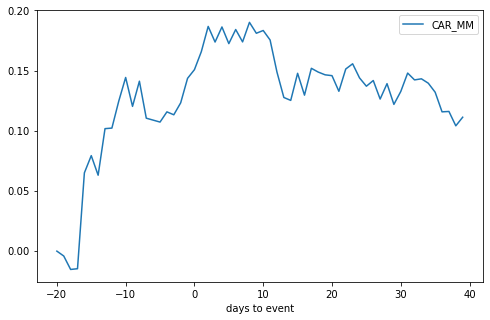

In [ ]:
returnsicicifinal.plot(x='days to event', y='CAR_MM',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

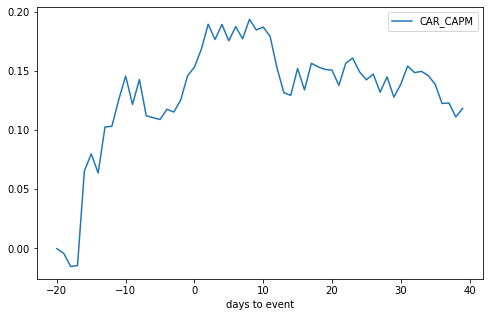

In [ ]:
returnsicicifinal.plot(x='days to event', y='CAR_CAPM',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

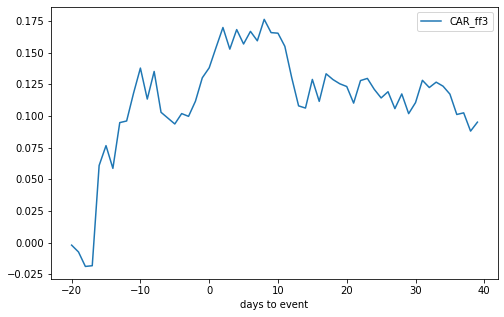

In [ ]:
returnsicicifinal.plot(x='days to event', y='CAR_ff3',figsize=(8,5))

<AxesSubplot:xlabel='days to event'>

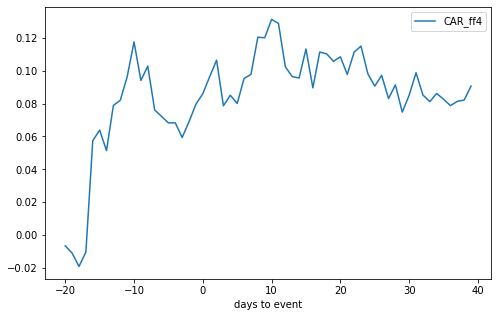

In [ ]:
returnsicicifinal.plot(x='days to event', y='CAR_ff4',figsize=(8,5))

Final Conclusions (Interpretation of above Graphs)

For all the 4 models, the figures suggest that the capital market perceives this event to be favourable for this particular security. At day 0, we see a sharp increase and soon the company seems to keep improve more within the event window itself (0, 20 days), infact, it peaks within the event window and later it dips a little but that's not related to our event.